In [55]:
import requests
import json
import gmaps
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
from scipy.stats import linregress
import csv

In [39]:
#import csv file from resources folder
yearly_data_2019 = pd.read_csv("Resources/yearly_data_clean_2019.csv")
yearly_data_2020 = pd.read_csv("Resources/yearly_data_clean_2020.csv")
yearly_data_2021 = pd.read_csv("Resources/yearly_data_clean_2021.csv")
yearly_data_2019.head()

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,990000.0,57.0,2425000.0,370000.0,661000.0,808000.0,1445000.0,...,1150000.0,71.0,2573000.0,115000.0,50.0,26.0,645.0,150.0,1250.0,400.0
1,3040,Aberfeldie,647,1368000.0,244.0,8000000.0,297000.0,480000.0,876000.0,1820000.0,...,1300000.0,285.0,8000000.0,280000.0,182.0,94.0,525.0,373.0,1400.0,250.0
2,3042,Airport West,757,953000.0,74.0,1500000.0,480000.0,610000.0,800000.0,1100000.0,...,953000.0,98.0,1470000.0,500000.0,62.0,24.0,475.0,125.0,1350.0,260.0
3,3021,Albanvale,787,596000.0,348.0,1400000.0,300000.0,410000.0,510000.0,650000.0,...,599000.0,532.0,2500000.0,60000.0,132.0,41.0,360.0,521.0,1647.0,190.0
4,3206,Albert Park,797,2575000.0,55.0,8600000.0,735000.0,1353000.0,1990000.0,3650000.0,...,2425000.0,52.0,13000000.0,315000.0,37.0,17.0,840.0,95.0,2000.0,350.0


In [101]:
Rank_median_sold_price = yearly_data_2019.sort_values(by = "medianSoldPrice" , ascending = False)
top_10_median_price_2019 = Rank_median_sold_price.head(10)
Rank_highest_sold_price = yearly_data_2019.sort_values(by = "highestSoldPrice" , ascending = False)
top_10_highest_price_2019 = Rank_highest_sold_price.head(10)
Rank_median_listing_price = yearly_data_2019.sort_values(by = "medianSaleListingPrice" , ascending = False)
top_10_median_listing_price_2019 = Rank_median_listing_price.head(10)
Rank_highest_listing_price = yearly_data_2019.sort_values(by = "highestSaleListingPrice" , ascending = False)
top_10_highest_listing_price_2019 = Rank_highest_listing_price.head(10)
Rank_median_sold_price = yearly_data_2019.sort_values(by = "medianSoldPrice" , ascending = True)
bottom_10_median_price_2019 = Rank_median_sold_price.head(10)
bottom_10_median_price_2019

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
172,3338,Melton South,25997,410000.0,204.0,855000.0,211000.0,300000.0,370000.0,440000.0,...,448000.0,666.0,4200000.0,32000.0,29.0,6.0,320.0,327.0,500.0,201.0
38,3338,Brookfield,6207,410000.0,204.0,855000.0,211000.0,300000.0,370000.0,440000.0,...,448000.0,666.0,4200000.0,32000.0,29.0,6.0,320.0,327.0,500.0,201.0
173,3337,Melton West,26007,448000.0,150.0,2200000.0,85000.0,350000.0,400000.0,505000.0,...,449000.0,249.0,750000.0,120000.0,13.0,4.0,340.0,166.0,600.0,265.0
156,3337,Kurunjang,22327,448000.0,150.0,2200000.0,85000.0,350000.0,400000.0,505000.0,...,449000.0,249.0,750000.0,120000.0,13.0,4.0,340.0,166.0,600.0,265.0
283,3024,Wyndham Vale,45307,475000.0,338.0,830000.0,307000.0,372000.0,432000.0,530000.0,...,495000.0,1010.0,1000000.0,100000.0,57.0,29.0,350.0,455.0,520.0,280.0
112,3200,Frankston North,15007,483000.0,107.0,570000.0,265000.0,410000.0,440000.0,515000.0,...,460000.0,179.0,640000.0,250000.0,20.0,9.0,320.0,172.0,410.0,230.0
220,3335,Rockbank,34697,500000.0,15.0,7891000.0,380000.0,380000.0,465000.0,563000.0,...,498000.0,749.0,2000000.0,10000.0,4.0,1.0,335.0,18.0,520.0,290.0
171,3048,Meadow Heights,25717,520000.0,87.0,831000.0,340000.0,362000.0,475000.0,570000.0,...,500000.0,182.0,1500000.0,335000.0,54.0,16.0,370.0,162.0,460.0,300.0
72,3048,Coolaroo,10107,520000.0,87.0,831000.0,340000.0,362000.0,475000.0,570000.0,...,500000.0,182.0,1500000.0,335000.0,54.0,16.0,370.0,162.0,460.0,300.0
204,3810,Pakenham,31947,523000.0,871.0,1850000.0,285000.0,440000.0,480000.0,585000.0,...,490000.0,1738.0,10000000.0,38000.0,52.0,17.0,360.0,1371.0,850.0,180.0


In [95]:
Rank_median_sold_price = yearly_data_2020.sort_values(by = "medianSoldPrice" , ascending = False)
top_10_median_price_2020 = Rank_median_sold_price.head(10)
Rank_highest_sold_price = yearly_data_2020.sort_values(by = "highestSoldPrice" , ascending = False)
top_10_highest_price_2020 = Rank_highest_sold_price.head(10)
Rank_median_listing_price = yearly_data_2020.sort_values(by = "medianSaleListingPrice" , ascending = False)
top_10_median_listing_price_2020 = Rank_median_listing_price.head(10)
Rank_highest_listing_price = yearly_data_2020.sort_values(by = "highestSaleListingPrice" , ascending = False)
top_10_highest_listing_price_2020 = Rank_highest_listing_price.head(10)
top_10_highest_listing_price_2020

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
55,3126,Canterbury,7907,2700000.0,87.0,8889000.0,768000.0,1336000.0,2100000.0,3538000.0,...,2850000.0,111.0,42000000.0,30000.0,64.0,37.0,933.0,120.0,3800.0,400.0
131,3122,Hawthorn,18087,2255000.0,160.0,10175000.0,252000.0,1073000.0,1675000.0,3350000.0,...,2300000.0,170.0,40000000.0,252000.0,97.0,76.0,680.0,340.0,4000.0,230.0
198,3805,Narre Warren South,30077,595000.0,347.0,1350000.0,403000.0,490000.0,550000.0,640000.0,...,580000.0,481.0,40000000.0,350000.0,19.0,13.0,375.0,554.0,699.0,295.0
199,3805,Narre Warren,30017,595000.0,347.0,1350000.0,403000.0,490000.0,550000.0,640000.0,...,580000.0,481.0,40000000.0,350000.0,19.0,13.0,375.0,554.0,699.0,295.0
268,3142,Toorak,40457,4500000.0,126.0,22200000.0,681000.0,1235000.0,2550000.0,6560000.0,...,5000000.0,186.0,24000000.0,30000.0,47.0,26.0,995.0,184.0,4606.0,295.0
249,3141,South Yarra,36877,1760000.0,119.0,19250000.0,360000.0,1075000.0,1400000.0,2810000.0,...,2000000.0,171.0,22000000.0,138000.0,69.0,40.0,690.0,492.0,4000.0,36.0
190,3931,Mornington,27897,846000.0,470.0,5500000.0,399000.0,535000.0,690000.0,1180000.0,...,850000.0,563.0,19000000.0,53000.0,83.0,38.0,495.0,281.0,4780.0,295.0
154,3101,Kew,21137,2180000.0,268.0,8200000.0,525000.0,1025000.0,1640000.0,3095000.0,...,2300000.0,363.0,18000000.0,400000.0,182.0,125.0,750.0,403.0,4200.0,200.0
11,3143,Armadale,1587,2445000.0,95.0,17250000.0,975000.0,1170000.0,1643000.0,3175000.0,...,2450000.0,108.0,17300000.0,399000.0,69.0,41.0,780.0,172.0,6000.0,320.0
263,3106,Templestowe,39607,1340000.0,203.0,5030000.0,640000.0,830000.0,1120000.0,1650000.0,...,1368000.0,288.0,14500000.0,3000.0,114.0,71.0,630.0,203.0,2200.0,345.0


In [97]:
Rank_median_sold_price = yearly_data_2021.sort_values(by = "medianSoldPrice" , ascending = False)
top_10_median_price_2021 = Rank_median_sold_price.head(10)
Rank_highest_sold_price = yearly_data_2021.sort_values(by = "highestSoldPrice" , ascending = False)
top_10_highest_price_2021 = Rank_highest_sold_price.head(10)
Rank_median_listing_price = yearly_data_2021.sort_values(by = "medianSaleListingPrice" , ascending = False)
top_10_median_listing_price_2021 = Rank_median_listing_price.head(10)
Rank_highest_listing_price = yearly_data_2021.sort_values(by = "highestSaleListingPrice" , ascending = False)
top_10_highest_listing_price_2021 = Rank_highest_listing_price.head(10)
top_10_highest_listing_price_2021

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
192,3930,Mount Eliza,28217,1453000.0,381.0,7080000.0,217000.0,830000.0,1140000.0,2030000.0,...,1490000.0,418.0,1.000000e+09,135000.0,8.0,5.0,750.0,111.0,1950.0,340.0
134,3122,Hawthorn,18087,2328000.0,141.0,9040000.0,427000.0,930000.0,1600000.0,3500000.0,...,2100000.0,203.0,4.000000e+07,400000.0,80.0,52.0,650.0,365.0,2821.0,200.0
57,3126,Canterbury,7907,2828000.0,98.0,7950000.0,720000.0,1295000.0,2300000.0,3370000.0,...,2800000.0,130.0,3.500000e+07,735000.0,45.0,35.0,800.0,90.0,3100.0,400.0
273,3142,Toorak,40457,4500000.0,131.0,24000000.0,871000.0,1235000.0,2610000.0,7400000.0,...,5250000.0,221.0,3.500000e+07,395000.0,33.0,18.0,980.0,187.0,4606.0,295.0
214,3810,Pakenham,31947,570000.0,842.0,1600000.0,288000.0,418000.0,520000.0,640000.0,...,525000.0,1842.0,2.500000e+07,25000.0,12.0,4.0,370.0,976.0,1735.0,82.0
256,3141,South Yarra,36877,1895000.0,141.0,8350000.0,350000.0,635000.0,1335000.0,2965000.0,...,1800000.0,215.0,2.000000e+07,315000.0,70.0,41.0,600.0,553.0,3500.0,36.0
155,3101,Kew,21137,2353000.0,250.0,9950000.0,625000.0,1001000.0,1660000.0,3140000.0,...,2250000.0,352.0,1.695000e+07,400000.0,135.0,98.0,730.0,337.0,4200.0,200.0
223,3944,Portsea,33327,2850000.0,69.0,12300000.0,1005000.0,1200000.0,1910000.0,3900000.0,...,2950000.0,67.0,1.575000e+07,350000.0,5.0,4.0,1000.0,27.0,2300.0,280.0
191,3931,Mornington,27897,950000.0,535.0,7500000.0,412000.0,580000.0,760000.0,1350000.0,...,950000.0,600.0,1.550000e+07,235000.0,21.0,16.0,510.0,240.0,1600.0,310.0
18,3034,Avondale Heights,1957,863000.0,133.0,2540000.0,503000.0,670000.0,770000.0,950000.0,...,800000.0,170.0,1.247500e+07,450000.0,76.0,62.0,430.0,212.0,1080.0,280.0


### The top 10 sell price suburb in 2019, 2020, 2021 (Median Sold Price&Highest Sold Price)

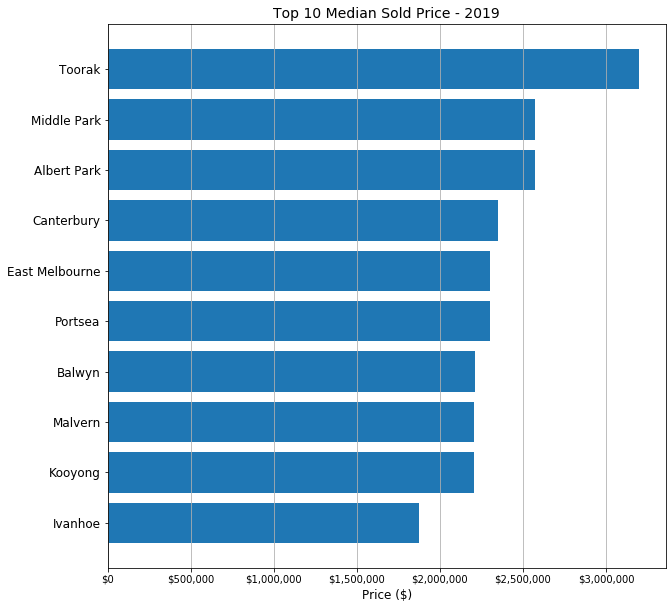

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_price_2019["medianSoldPrice"]
y_axis = top_10_median_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Sold Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

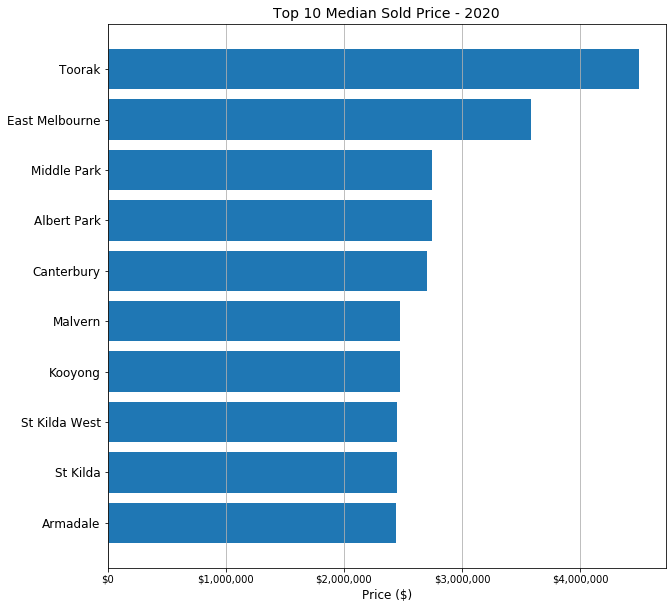

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_price_2020["medianSoldPrice"]
y_axis = top_10_median_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Sold Price - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

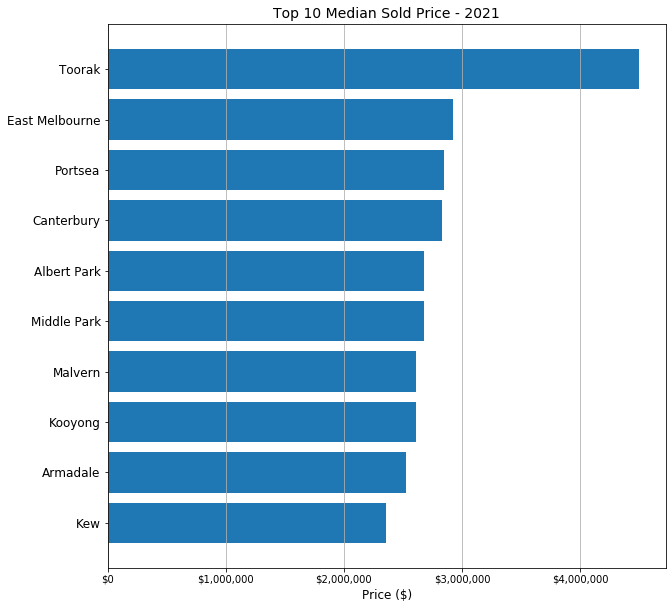

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_price_2021["medianSoldPrice"]
y_axis = top_10_median_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Sold Price - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

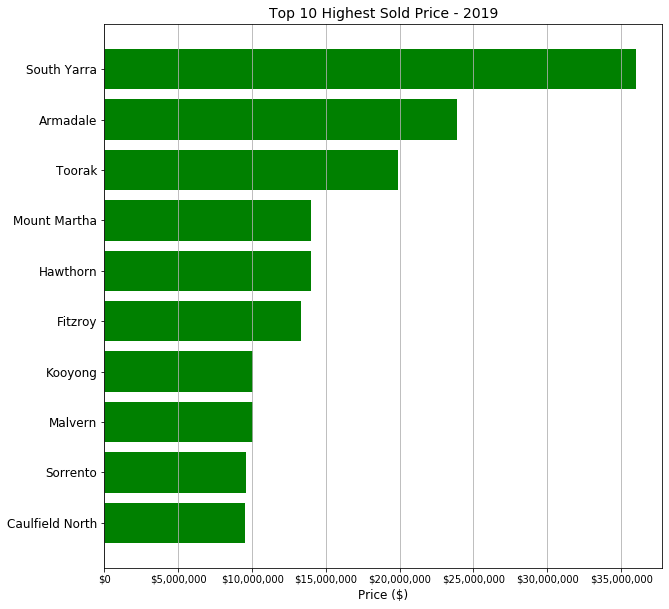

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_price_2019["highestSoldPrice"]
y_axis = top_10_highest_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'g')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Sold Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

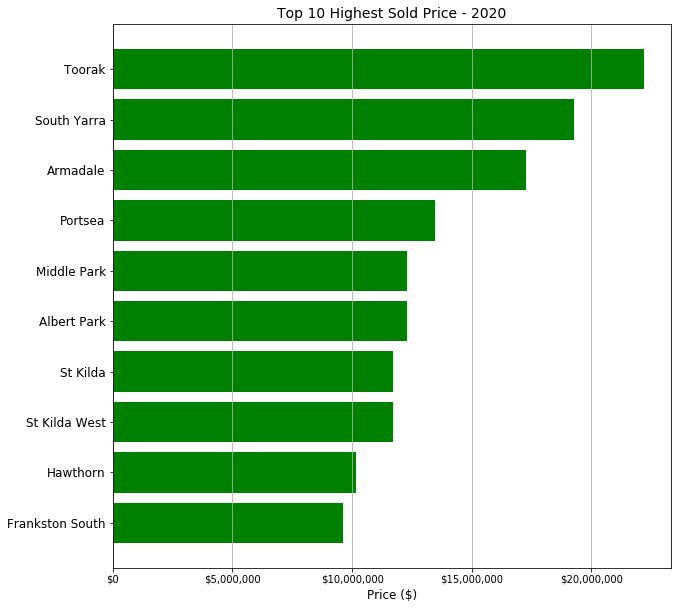

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_price_2020["highestSoldPrice"]
y_axis = top_10_highest_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'g')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Sold Price - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

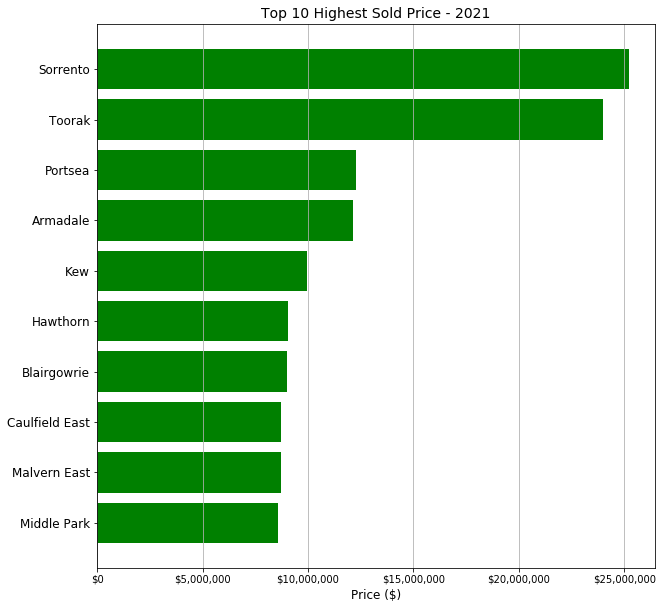

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_price_2021["highestSoldPrice"]
y_axis = top_10_highest_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'g')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Sold Price - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

### The top 10 list price suburb in 2019, 2020, 2021 (Median Sale Listing Price&Highest Sale Listing Price)

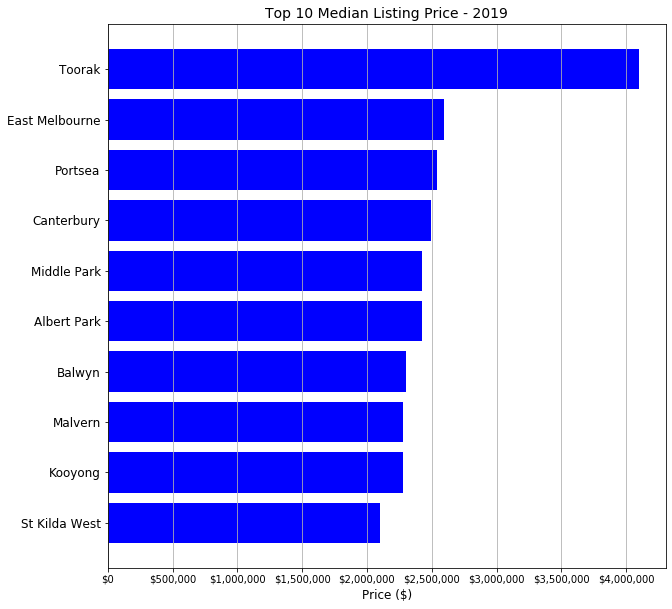

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_listing_price_2019["medianSaleListingPrice"]
y_axis = top_10_median_listing_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'b')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Listing Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

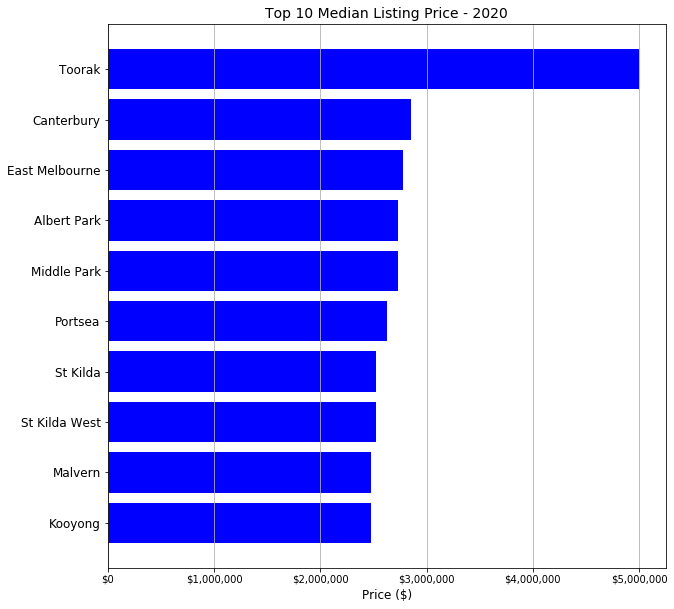

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_listing_price_2020["medianSaleListingPrice"]
y_axis = top_10_median_listing_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'b')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Listing Price - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

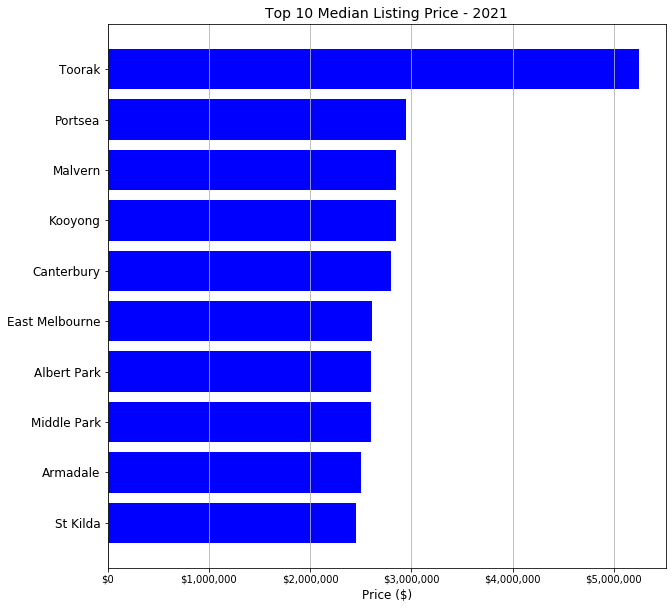

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_median_listing_price_2021["medianSaleListingPrice"]
y_axis = top_10_median_listing_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'b')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Median Listing Price - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

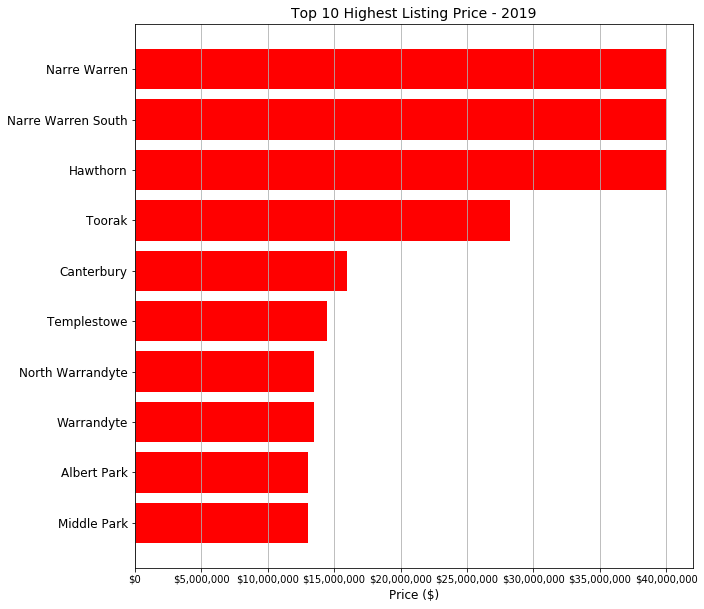

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_listing_price_2019["highestSaleListingPrice"]
y_axis = top_10_highest_listing_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'r')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Listing Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

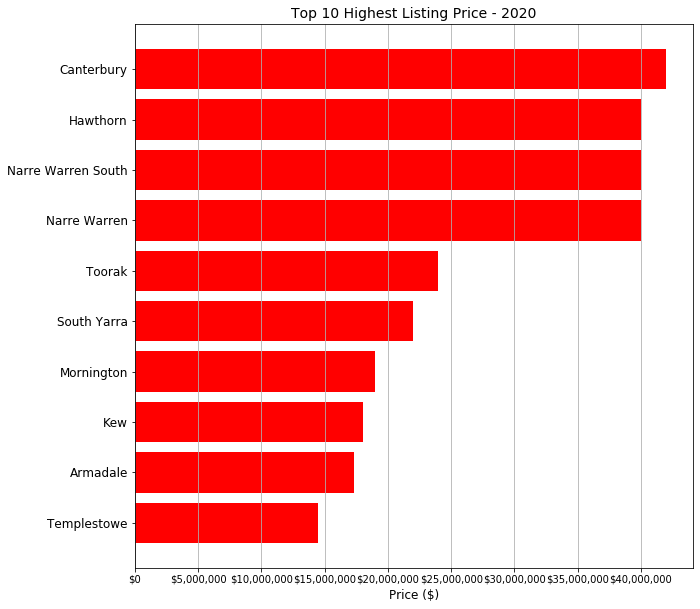

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_listing_price_2020["highestSaleListingPrice"]
y_axis = top_10_highest_listing_price_2020["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'r')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Listing Price - 2020", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

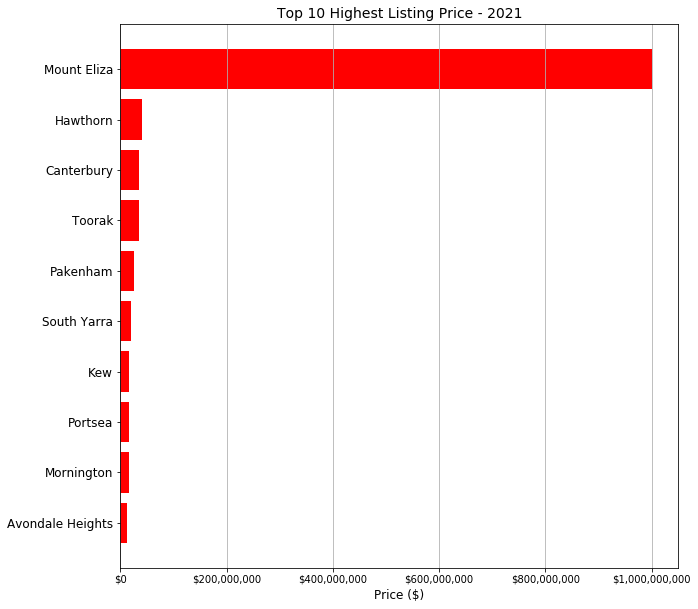

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = top_10_highest_listing_price_2021["highestSaleListingPrice"]
y_axis = top_10_highest_listing_price_2021["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center', color = 'r')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Top 10 Highest Listing Price - 2021", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

### The bottom 10 sell price suburb in 2019, 2020, 2021 (Median Sold Price&Lowest Sold Price)

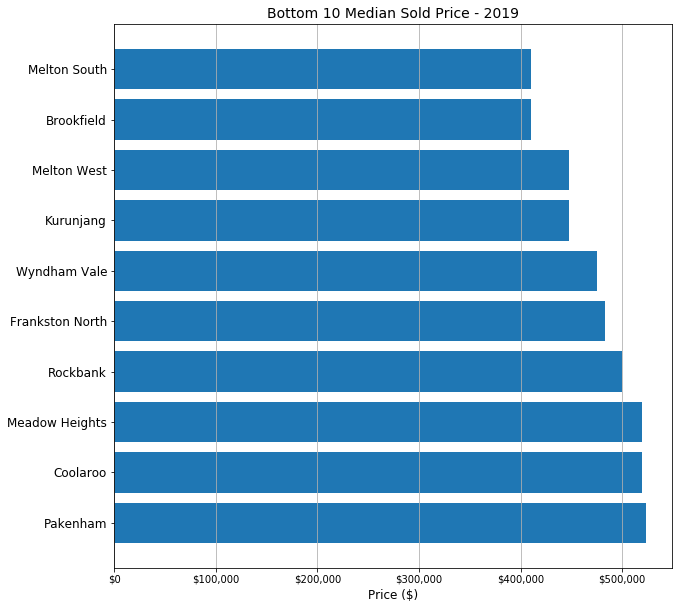

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#set x_axis & y_axis
x_axis = bottom_10_median_price_2019["medianSoldPrice"]
y_axis = bottom_10_median_price_2019["Suburb"]

#create the plot
ax.barh(y_axis, x_axis, align='center')

ax.set_yticklabels(y_axis, size=12) #set suburb in y axis
ax.set_xlabel("Price ($)", size=12) #set lable in x axis
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title("Bottom 10 Median Sold Price - 2019", size=14) #set title of the plot

#set the format of the x axis with $ and comma
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#set the gird behind the chart to have a better view
plt.grid(axis = "x")
plt.show()

### The top 10 rent list price suburb in 2019, 2020, 2021 (Median Rent Listing Price&Highest Rent Listing Price)

### The bottom 10 rent list price suburb in 2019, 2020, 2021 (Median Rent Listing Price& Lowest Rent Listing Price)